In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from pprint import pprint
import seaborn
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from math import pi
from math import exp
import math
import sys
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
eps = np.finfo(float).eps
train_data = pd.read_csv('../input_data/Q1/intrusion_detection/data.csv')
Y=train_data.iloc[:,29:30]
train_data = train_data.iloc[:, :-1]

In [31]:
def normalize_data(X_train):
    X_train=(X_train-X_train.mean())/(X_train.std()+eps)
    return X_train

In [32]:
def s_mat(X_train):
    X_train_mat = np.asmatrix(X_train)
    sigma = np.dot(X_train_mat.T,X_train_mat)
    return sigma

In [33]:
def new_dimentionality(X_train,maxi_cols):
    eigVals, eigVec = np.linalg.eig(X_train)
    lis = []
    for i in range(len(eigVec)):
        lis.append((eigVals[i],eigVec[:,i].reshape(1,29)))
    lis.sort(key = lambda x: x[0])
    lis.reverse()
    sum_ = 0
    for a,b in lis:
        sum_+=a 
    s_t = 0
    count=0
    list_new = []
    for a,b in lis:
        s_t+=a
        count+=1
        list_new.append(np.array(b)[0])
        if(s_t/sum_>=0.9 or count==maxi_cols):
            return count,np.array(list_new).T

In [34]:
X = normalize_data(train_data)
count,fXf = new_dimentionality(s_mat(X),14)
final_result_1 =np.dot(X,fXf)
X = pd.DataFrame(final_result_1, columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
final_result = np.concatenate((final_result_1, np.array(Y)), axis=1)
final_result = pd.DataFrame(final_result, columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

## Q2

In [35]:
def Euclidean_distance(node1,node2):
    return np.linalg.norm(node1-node2)

In [36]:
def clustering_start_centroids(data,k=5):
    from copy import deepcopy 
    mat=X.values
    y=0
    while y!=5:
        centroids = {}
        for i in range(k):
            coord = []
            for j in range(len(mat[0])):
                coord.append(np.random.randint(int(min(mat[:,j])),int(max(mat[:,j]))))
            centroids[i]=coord
        finaler=[]
        for featureset in data:
                distances = [np.linalg.norm(featureset-centroids[centroid]) for centroid in centroids]    
                classification = np.argmin(distances)
                finaler.append(classification)
        finaler_S = set(finaler)
        y=len(finaler_S)
    return centroids,finaler

In [37]:
X = normalize_data(train_data)
train_data = pd.read_csv('../input_data/Q1/intrusion_detection/data.csv')
Y=train_data.iloc[:,29:30]
count,fXf = new_dimentionality(s_mat(X),5)
final_result_1 =np.dot(X,fXf)
X = pd.DataFrame(final_result_1, columns=[1,2,3,4,5])

In [260]:
X=normalize_data(X)
start,finaler = clustering_start_centroids(np.array(X),5)

In [261]:
import copy
k=5
data = X.values
counter = 10
centroids=start
c_old=finaler
while counter:
    classifications ={} 
    for i in range(k):
        classifications[i]=[]
    
    c_old=copy.deepcopy(finaler)
    finaler=[]
    for featureset in data:
            distances = [np.linalg.norm(featureset-centroids[centroid]) for centroid in centroids]    
            classification = np.argmin(distances)
            finaler.append(classification)
            classifications[classification].append(featureset)
    counter-=1
    prev_centroids = dict(centroids)
    print(counter)
    for classification in classifications:
        centroids[classification] = np.average(classifications[classification],axis=0)
    if counter==0 or c_old==finaler:
        break 

9


In [262]:
train_data = pd.read_csv('../input_data/Q1/intrusion_detection/data.csv')
Y=train_data.iloc[:,29:30]
a_label=np.array(Y)
data = final_result
c_mat = np.zeros((5,5))
c_mat = c_mat.astype(int)
c_label=finaler
cleanup_nums = {"xAttack":{"normal": 0, "dos": 1, "probe": 2, "r2l" : 3, "u2r": 4}}
new_df = Y
new_df.replace(cleanup_nums, inplace=True)
new_df.head()
actual_labels = np.array(new_df['xAttack'])
for i in range(len(c_label)):
    x = c_label[i]
    c_mat[x,actual_labels[i]] += 1

temp = np.amax(c_mat,axis=1)
purity_K = float(np.sum(temp))/len(c_label)
print(' Average purity is ' + str(purity_K))

 Average purity is 0.5346027682214577


### Q1_3 GMM

In [265]:
data = X
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(data)
c_label = gmm.predict(data)

In [267]:
train_data_1 = pd.read_csv('../input_data/Q1/intrusion_detection/data.csv')
Y=train_data_1.iloc[:,29:30]
data = final_result
c_mat = np.zeros((5,5))
c_mat = c_mat.astype(int)

cleanup_nums = {"xAttack":{"normal": 0, "dos": 1, "probe": 2, "r2l" : 3, "u2r": 4}}
new_df = Y
new_df.replace(cleanup_nums, inplace=True)
new_df.head()
actual_labels = np.array(new_df['xAttack'])
for i in range(len(c_label)):
    x = c_label[i]
    c_mat[x,actual_labels[i]] += 1

temp = np.amax(c_mat,axis=1)
purity_G = float(np.sum(temp))/len(c_label)
print("Average Purity is ",purity_G)

Average Purity is  0.8070245619649572


## Q4 Hierarical clustering

In [247]:
from sklearn.cluster import AgglomerativeClustering

In [248]:
def Hier(X):
    data= X
    Hclustering = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')
    Hclustering.fit(data)
    return Hclustering

In [249]:
CLus = Hier(X)

In [264]:
tem = pd.read_csv('../input_data/Q1/intrusion_detection/data.csv')
Y=tem.iloc[:,29:30]
a_label=np.array(Y)
data = final_result
c_mat = np.zeros((5,5))
c_mat = c_mat.astype(int)

cleanup_nums = {"xAttack":{"normal": 0, "dos": 1, "probe": 2, "r2l" : 3, "u2r": 4}}
new_df = Y
new_df.replace(cleanup_nums, inplace=True)
new_df.head()
actual_labels = np.array(new_df['xAttack'])
for i in range(len(c_label)):
    x = c_label[i]
    c_mat[x,actual_labels[i]] += 1
temp = np.amax(c_mat,axis=1)
purity_H = float(np.sum(temp))/len(c_label)
print('Average purity is ' + str(purity_H))

Average purity is 0.8271461716937355


## Methods Vs Purity

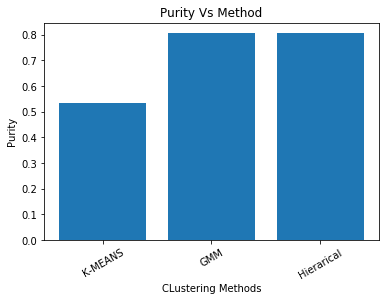

In [251]:
label=['K-MEANS','GMM','Hierarical']
purity = [purity_K,purity_G,purity_G]
index = np.arange(len(label))
plt.bar(index, purity)
plt.xlabel('CLustering Methods', fontsize=10)
plt.ylabel('Purity', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Purity Vs Method')
plt.show()

## Q5

using PCA dimensionality reduction on original data can be done.
As the data contains the categorical data and PCA can be done on contigous data ,so we can apply one-hot-encoding on the categorical part which converts the whole data set into contigous data,and hence PCA can now be easily done on the dataset